In [516]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import pandas as pd
from matplotlib import pyplot as plt


In [517]:
reader = pd.read_csv('train.csv')

In [518]:
dev = np.array(reader)
n_data = 1000
Y = dev[:n_data,0]
X = dev[:n_data,1:].reshape(n_data,28,28,1)

In [519]:
model = Sequential()

In [520]:
model.add( Conv2D( 64, (3,3), input_shape=(28,28,1) )) 
model.add( Activation('relu'))
model.add( MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D( 64, (3,3), input_shape=(28,28,1) )) 
model.add( Activation('relu'))
model.add( MaxPooling2D(pool_size = (2,2)))


c:\Users\MSiGAMING\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [521]:
model.add(Flatten())
model.add(Dense(64, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))


In [522]:
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=[ "accuracy" ]
)

In [523]:
model.fit(X,Y, epochs = 3)

Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2757 - loss: 10.8955
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7907 - loss: 0.6700
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9158 - loss: 0.2863


In [524]:
urutan = 7
prediction = model.predict(dev[n_data+urutan,1:].reshape(-1,28,28,1))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[3.9944747e-03 1.8795566e-03 2.1998386e-03 1.8762562e-02 3.3118147e-03
  7.4935377e-01 4.1698717e-02 1.3952587e-04 1.6339441e-01 1.5265244e-02]]


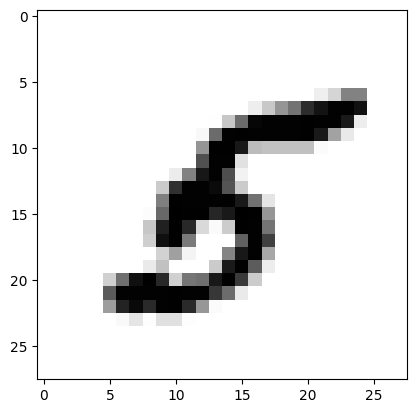

In [525]:
plt.imshow( 
    dev[n_data+urutan, 1:].reshape(28,28)
    ,cmap="Greys"
)

In [526]:
print(f"prediction  :: {prediction.argmax()}")
print(f"Label Number :: {dev[n_data+urutan, 0]}")

prediction  :: 5
Label Number :: 5
